In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import requests

In [ ]:
with open("example_index", "wb") as f:
  r = requests.get("http://webdatacommons.org/hyperlinkgraph/data/example_index")
  f.write(r.content)

with open("example_arcs", "wb") as f:
  r = requests.get("http://webdatacommons.org/hyperlinkgraph/data/example_arcs")
  f.write(r.content)

In [ ]:
nodes = np.loadtxt("example_index", dtype=object)[:, 0]
edges = np.loadtxt("example_arcs", dtype=int)

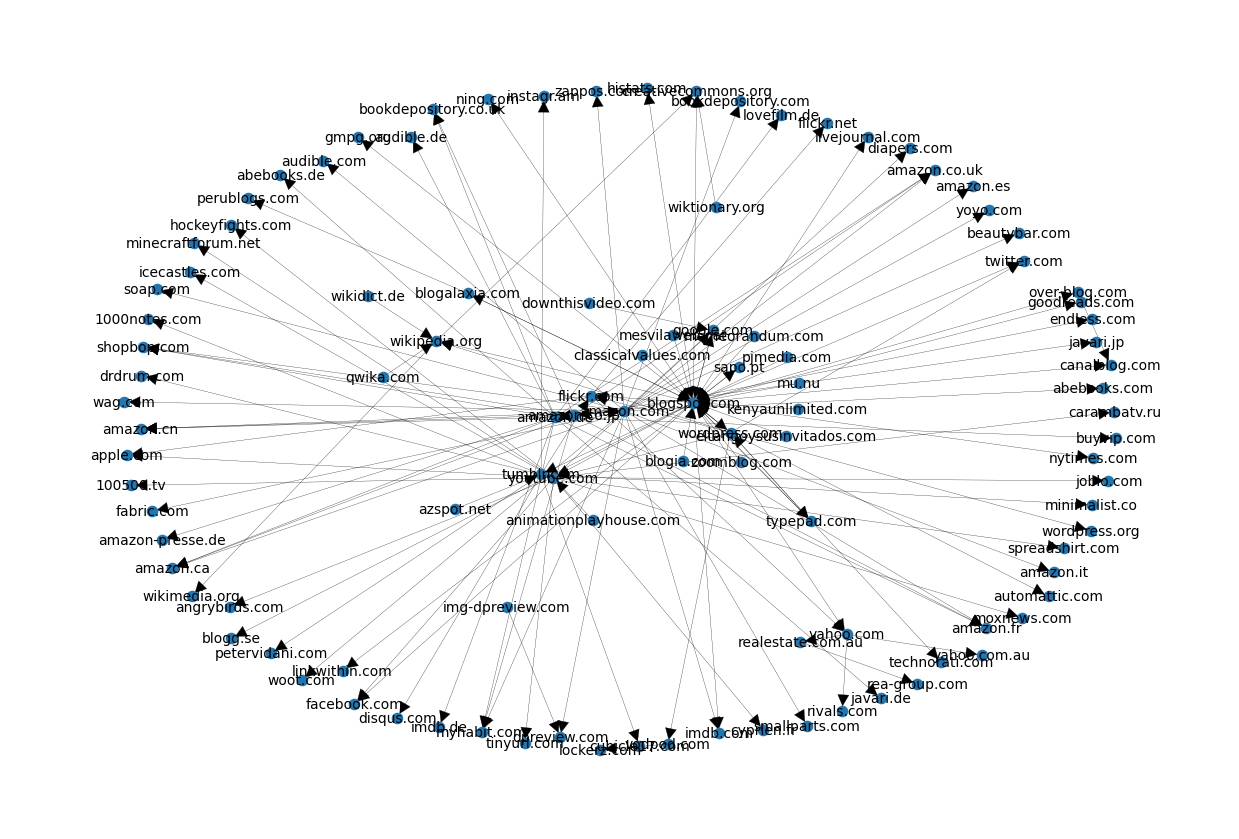

In [ ]:
import networkx as nx

G = nx.DiGraph()

for n1, n2 in edges:
  G.add_edge(nodes[n1], nodes[n2])

pos = nx.spring_layout(G, k=1, iterations=200)

plt.figure(dpi=200)
nx.draw(G, pos, with_labels=True, node_size=10, font_size=5, width=0.1)
plt.show()

In [ ]:
def pagerank(edges, beta=0.2, threshold=20^-10, n_epochs=200):
  n_nodes = 0
  for u, v in edges:
    n_nodes = max(u, v, n_nodes)
  n_nodes += 1

  adj = [[] for _ in range(n_nodes)]

  for u, v in edges:
    adj[u].append(v)
  
  r = [1/n_nodes] * n_nodes

  for epoch in range(n_epochs):

    r_next = [0] * n_nodes
    
    for u, uN in enumerate(adj):
      du = len(uN)
      ru = r[u]

      for v in uN:
        r_next[v] += (1-beta) * ru / du
    
    for u in range(n_nodes):
      r_next[u] += beta / n_nodes

    rsize = sum(r_next)
    for i in range(n_nodes):
      r_next[i] /= rsize
    
    delta = sum(abs(a - b) for a, b in zip(r, r_next))
    r = r_next

    if delta < threshold:
      break
  
  return r

r = pagerank(edges)
print(r)

[0.007770411469035269, 0.005525895713131539, 0.0039009099872644544, 0.0040491478718617194, 0.0040491478718617194, 0.005002280856756619, 0.005002280856756619, 0.004337907885333343, 0.005002280856756619, 0.004713520843284995, 0.004565282958687729, 0.0039009099872644544, 0.005002280856756619, 0.0039009099872644544, 0.005525895713131539, 0.00361214997379283, 0.01503112346987709, 0.0039009099872644544, 0.0040491478718617194, 0.006513196025894749, 0.00361214997379283, 0.0039009099872644544, 0.01155951239781844, 0.01155951239781844, 0.00361214997379283, 0.11934912090377979, 0.004713520843284995, 0.0039009099872644544, 0.0040491478718617194, 0.029263501977469655, 0.005525895713131539, 0.00361214997379283, 0.0366380926238097, 0.007770411469035269, 0.005525895713131539, 0.0039009099872644544, 0.007770411469035269, 0.00361214997379283, 0.009433104018929188, 0.005525895713131539, 0.00361214997379283, 0.0039009099872644544, 0.0039009099872644544, 0.01347325813715715, 0.0186188199451628, 0.013117377

In [ ]:
s = sorted(((r_n, n) for r_n, n in zip(r, nodes)), reverse=True)

for a in s:
  print(a)

(0.11934912090377979, 'blogspot.com')
(0.0366380926238097, 'creativecommons.org')
(0.029263501977469655, 'canalblog.com')
(0.025614515145103725, 'rea-group.com')
(0.025524946513249828, 'wikipedia.org')
(0.023158536168119363, 'wikimedia.org')
(0.021064740154563992, 'yahoo.com')
(0.019992752481585094, 'youtube.com')
(0.019005452168821886, 'tumblr.com')
(0.019005452168821886, 'google.com')
(0.018941876154546983, 'wordpress.com')
(0.0186188199451628, 'flickr.com')
(0.01503112346987709, 'apple.com')
(0.01446055844992036, 'typepad.com')
(0.01446055844992036, 'twitter.com')
(0.014366062058205733, 'yahoo.com.au')
(0.014366062058205733, 'rivals.com')
(0.014366062058205733, 'realestate.com.au')
(0.013587445695991981, 'lockerz.com')
(0.01347325813715715, 'facebook.com')
(0.013117377730538381, 'flickr.net')
(0.012464144763618436, 'perublogs.com')
(0.011848272411290064, 'imdb.com')
(0.01155951239781844, 'sapo.pt')
(0.01155951239781844, 'over-blog.com')
(0.01155951239781844, 'nytimes.com')
(0.011559